# COVID-19

# 1-Analyse de forme

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

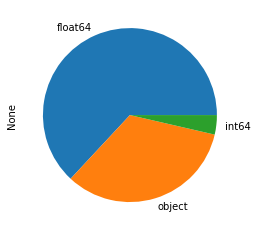

In [60]:
pd.set_option('display.max_row',111) # pour afficher tous les lignes en resultat
pd.set_option('display.max_column',111)# pour afficher tous les colones en resultat
data=pd.read_excel("dataset.xlsx")
data.head()
# notre target est sars-cov-2 exam result
data.shape
# nbr ligne 5644 et nbr cole 111
data.dtypes.value_counts().plot.pie() # connaitre les types des variables
data.head()



<AxesSubplot:>

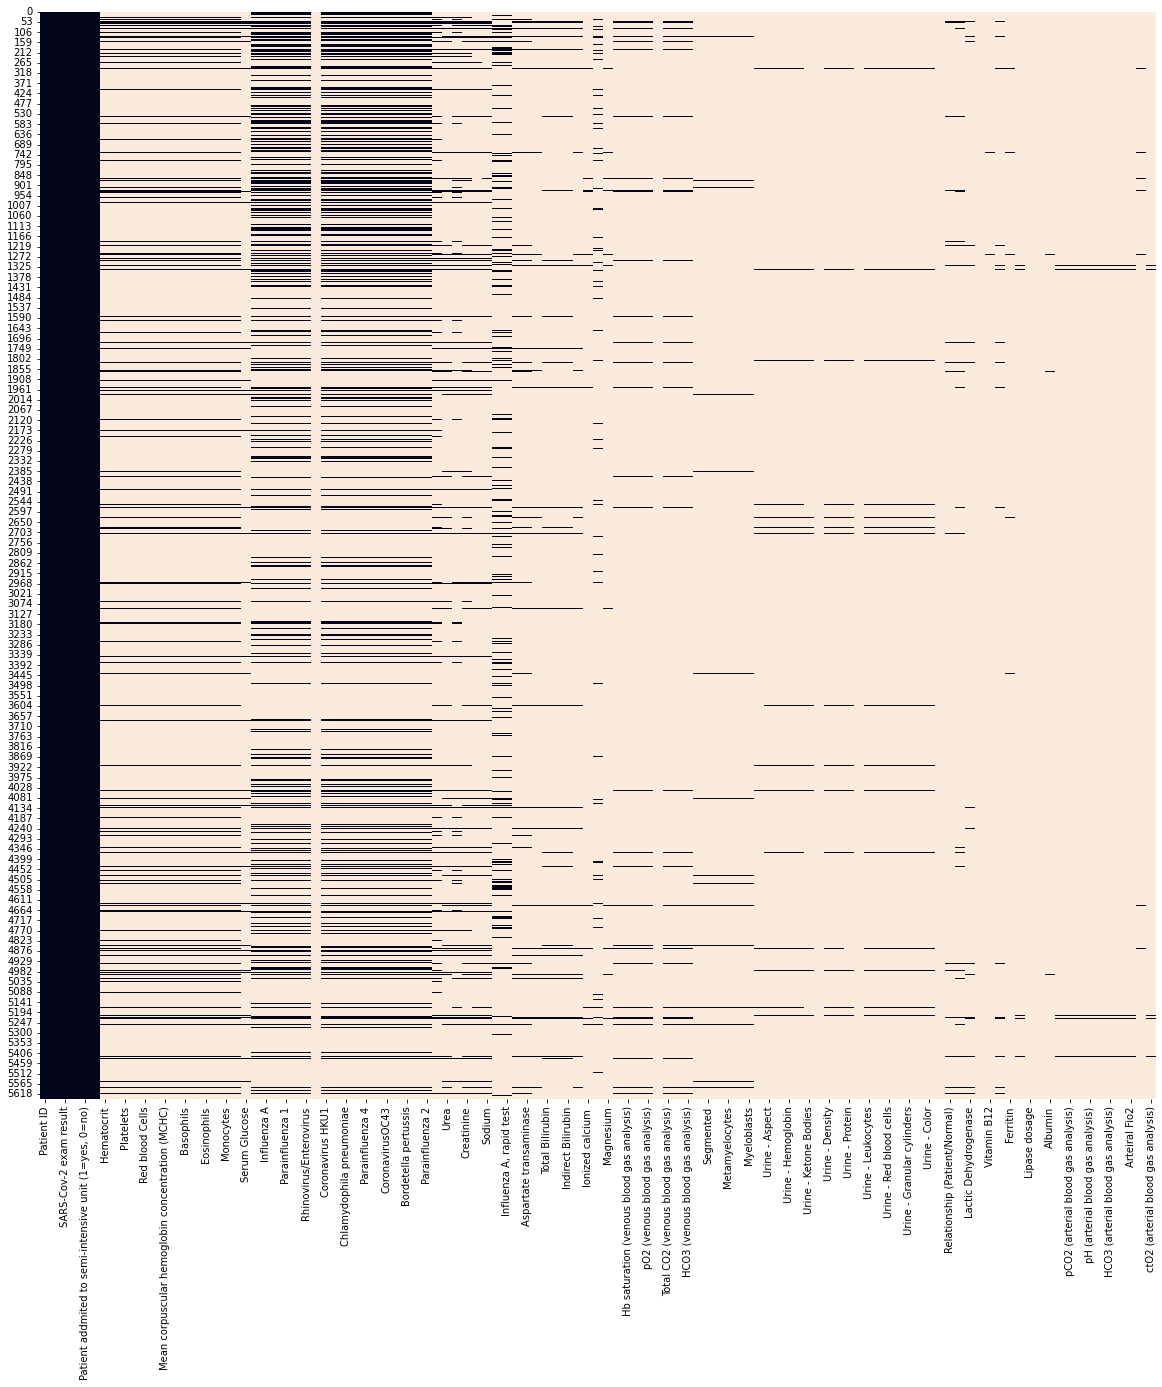

In [61]:
#analyse des NAN
plt.figure(figsize=(20,20))
sns.heatmap(data.isna(), cbar=False)#isna : verifie si une valeur note a number


In [34]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)#pourcentage des valeurs nan par ligne(shape[0])triée par ordre ascendant



Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

# 2- ANALYSE DE FOND
1-visualisation initiale et eliminer les colones inutules

In [64]:
#eliminer les variables qui sont plus de 90% des valeurs manquantes

df=data[data.columns[data.isna().sum()/data.shape[0]<0.9]] # les colones qui contienent des pourcentage des nan <90%
df.shape
df=df.drop('Patient ID', axis=1) #effacer la colone ID car cest inutule
df.shape

(5644, 38)

<AxesSubplot:>

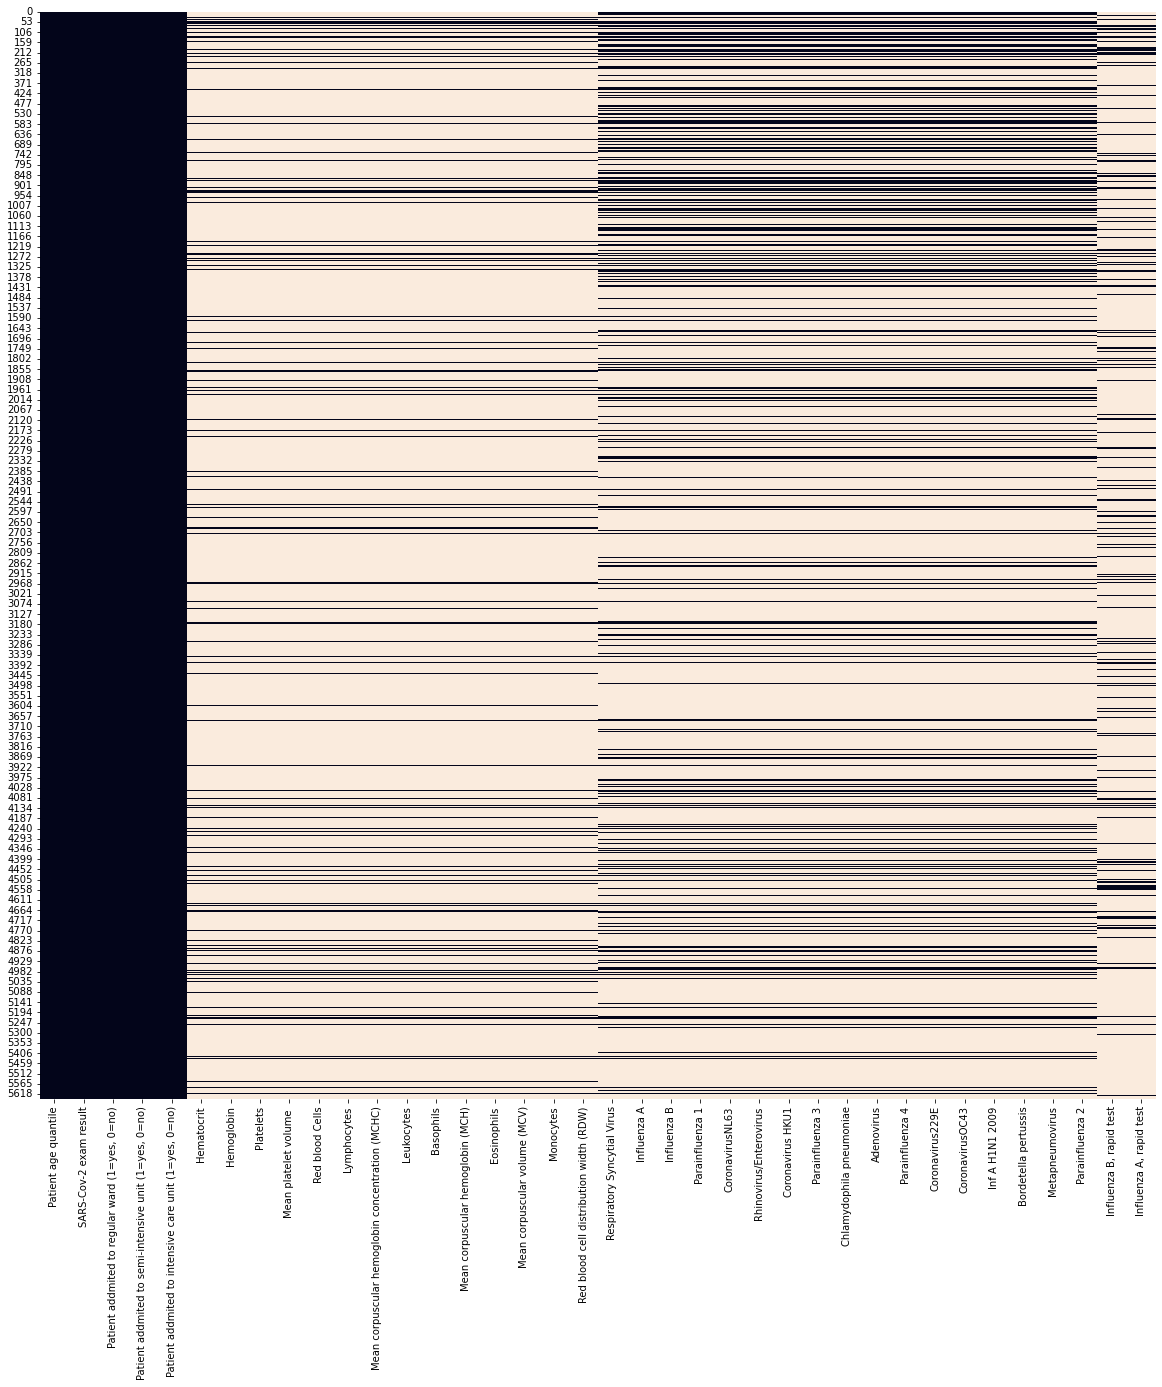

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(), cbar=False)#isna : verifie si une valeur note a number

2- visualisation du target

In [66]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)# normalize=true pour afficher ces valeurs en pourcentage

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

3- visualisation des variable

C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

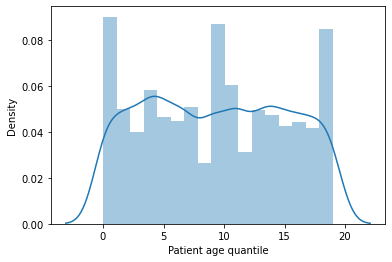

In [67]:
sns.distplot(df['Patient age quantile'])

4- relation entre les variables et le target

In [68]:
#creation des sous ensembles negatives et positif

positif_df=df[df['SARS-Cov-2 exam result']=='positive']
negatif_df=df[df['SARS-Cov-2 exam result']=='negative']
negatif_df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5637                    12               negative   
5638                    14               negative   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5637                                               0   
5638                                               0   
5640                                               0   
5641                                               0   
5642                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5637                                                  0       
5638                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5637                                                  0             NaN   
5638                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1       -0.02234  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5637         NaN        NaN                    NaN              NaN   
5638         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
0             NaN                                               NaN   
1        0.318366                          

In [69]:
#creation des ensembles blood et viral
missing_rate=data.isna().sum()/data.shape[0]
blood_columns=data.columns[(missing_rate<0.9)&(missing_rate)>0.88]
viral_columns=data.columns[(missing_rate<0.88)&(missing_rate)>0.75]
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

ValueError: could not convert string to float: 'not_detected'

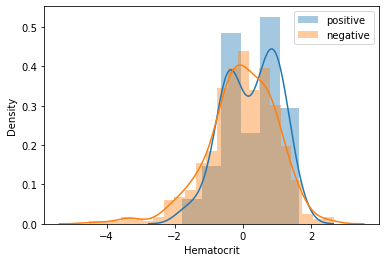

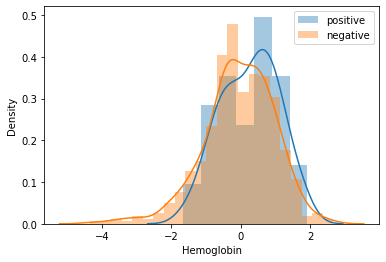

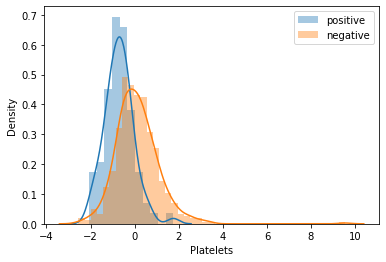

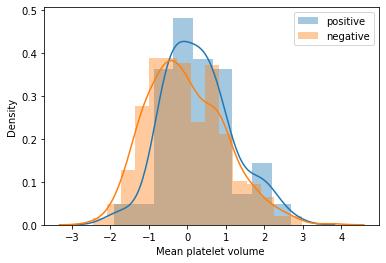

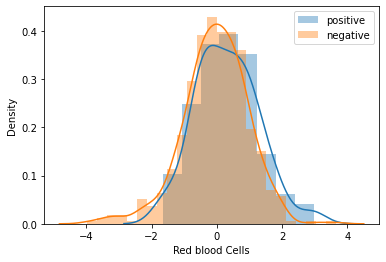

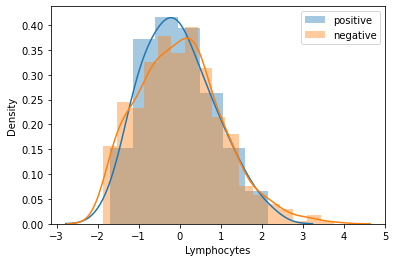

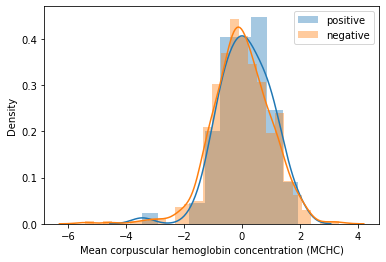

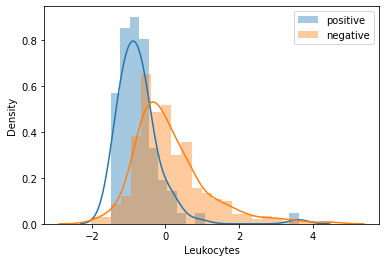

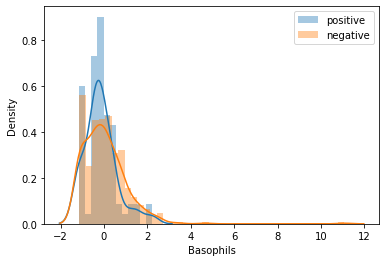

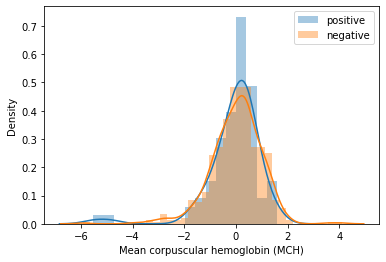

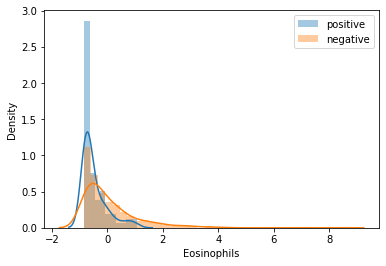

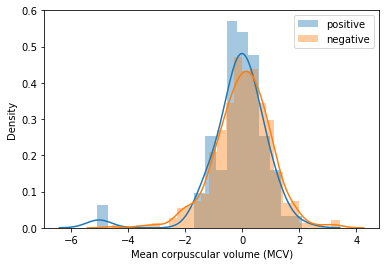

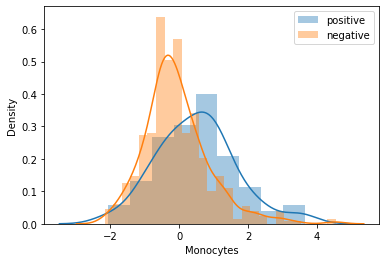

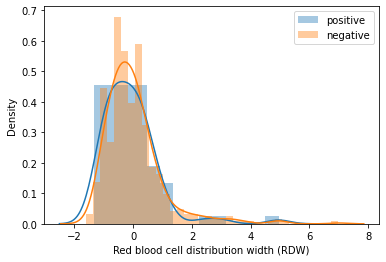

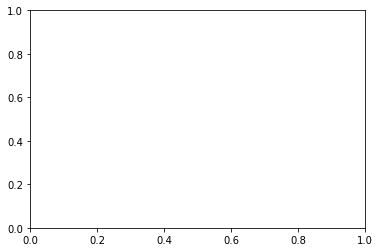

In [70]:
# relation target/blood
for col in blood_columns:
    plt.figure()
    sns.distplot(positif_df[col], label='positive')
    sns.distplot(negatif_df[col], label='negative')
    plt.legend()
    
#conclusion de la partie relation: le taux de Monocytes, Plateletes, leukocytes semblent etre liées avec covis 19

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

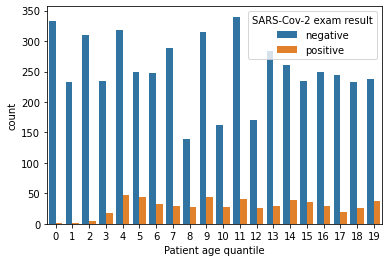

In [74]:
#relation entre age et target 
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

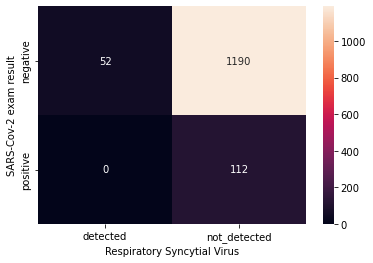

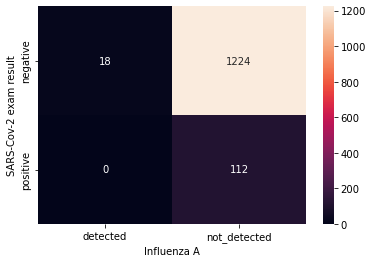

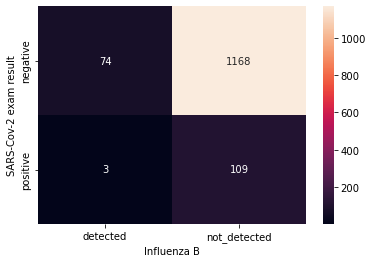

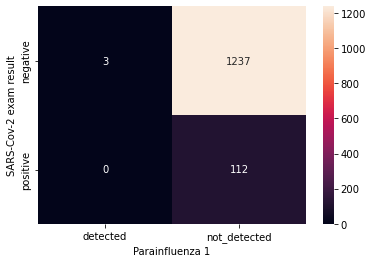

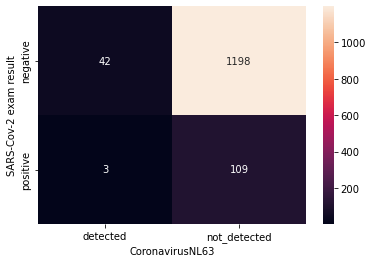

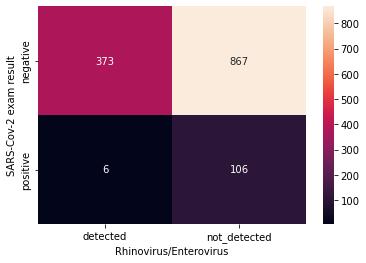

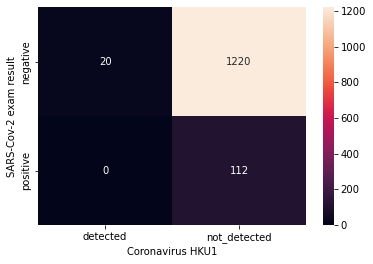

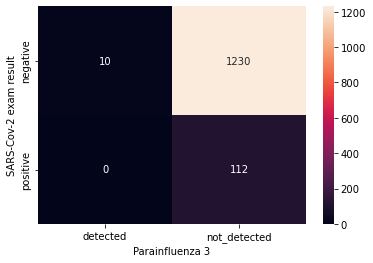

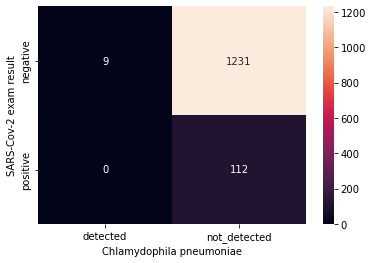

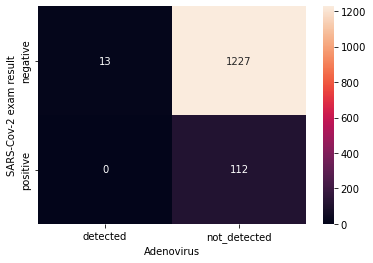

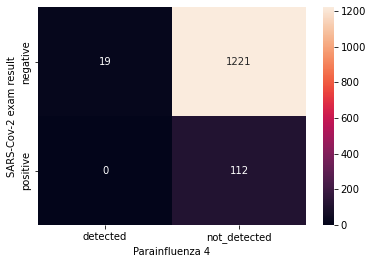

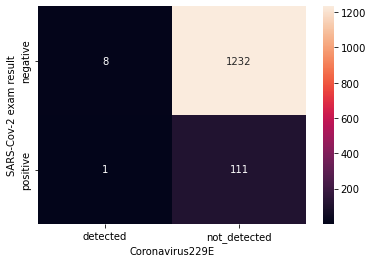

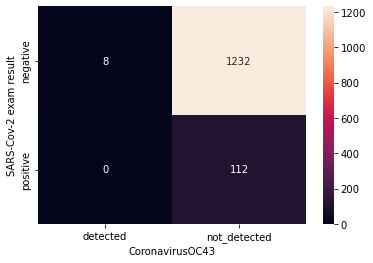

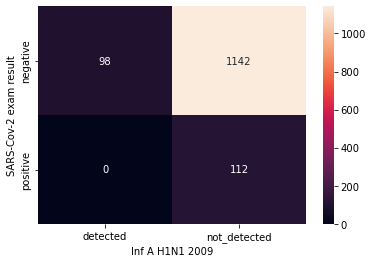

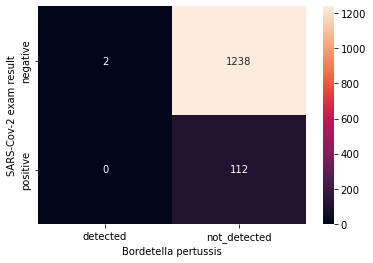

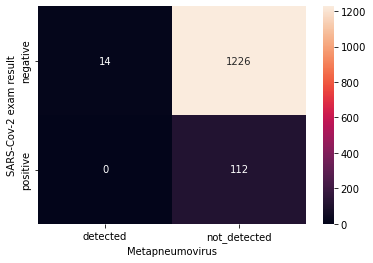

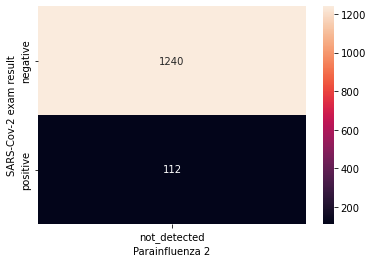

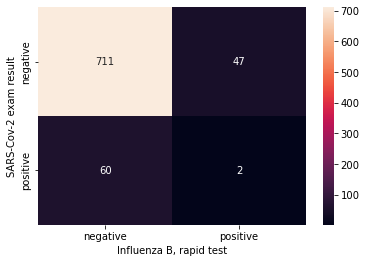

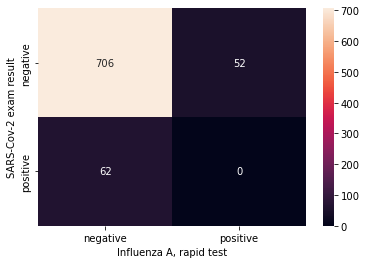

In [71]:
#relation entre target et les test viraux
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]), annot=True, fmt='d')
 

In [80]:
#analyse avancéé : relation variable /variable
#1_ blood/blood

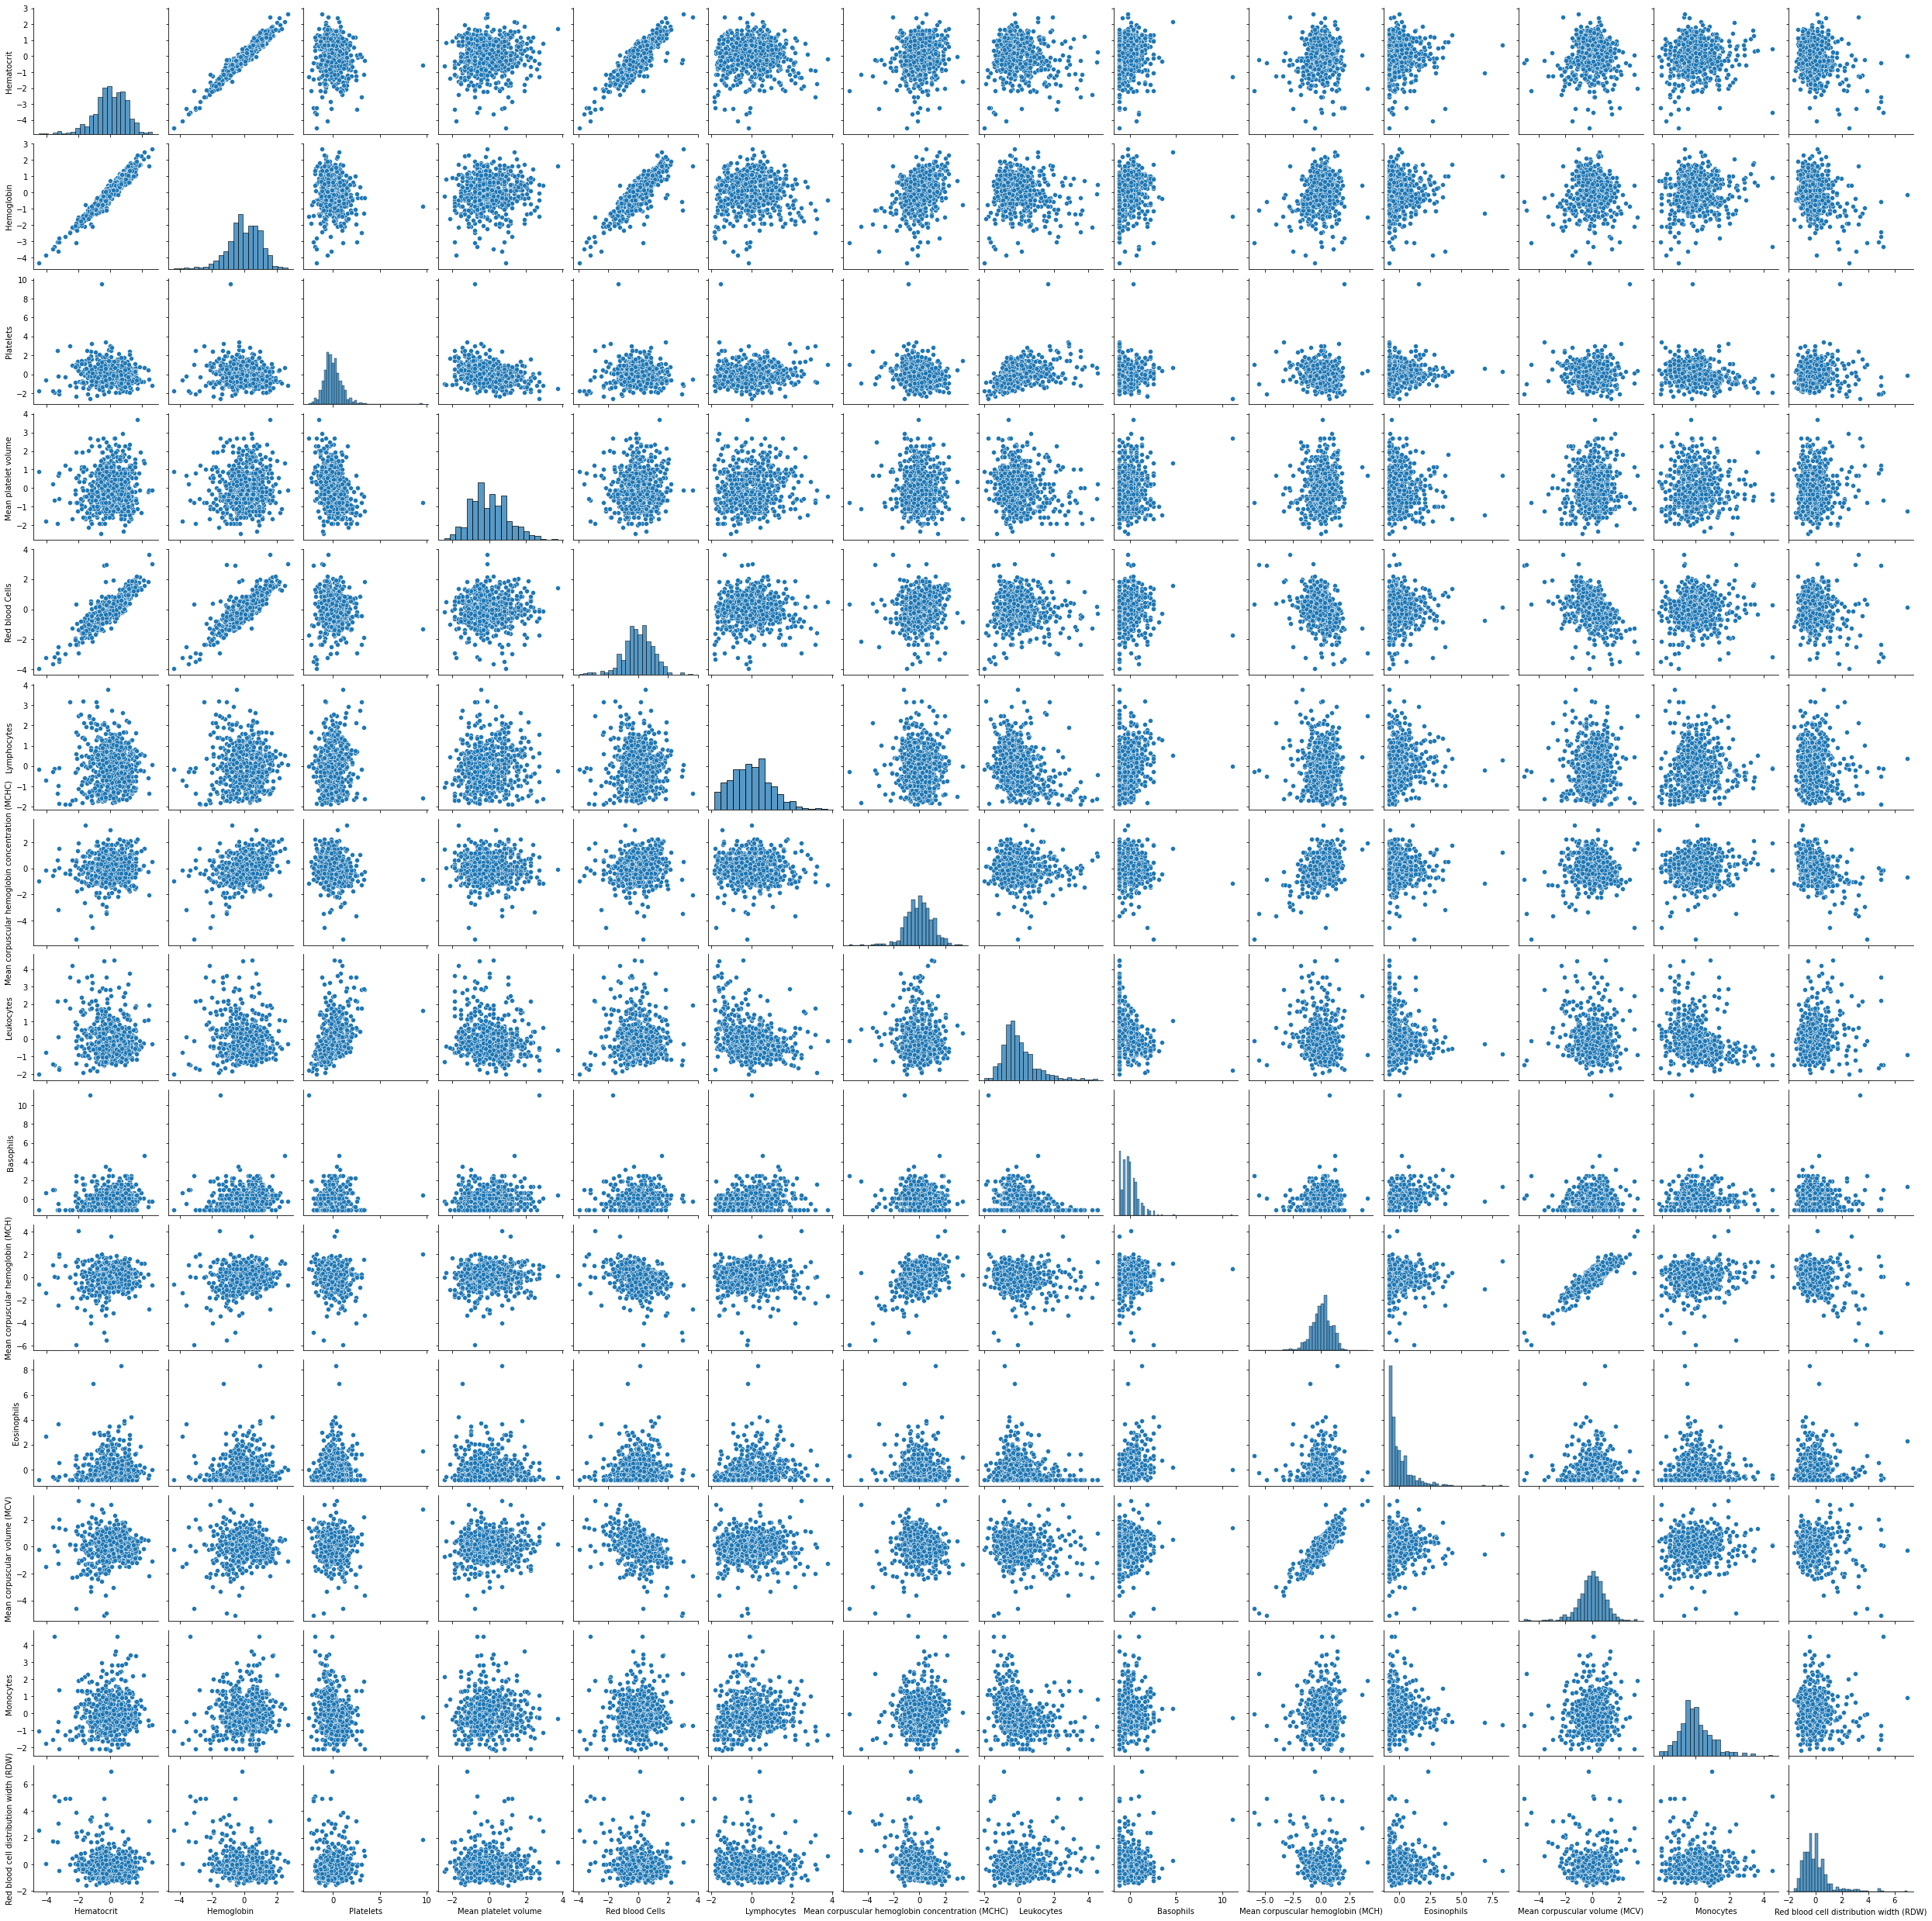

In [72]:
sns.pairplot(df[blood_columns])


<AxesSubplot:>

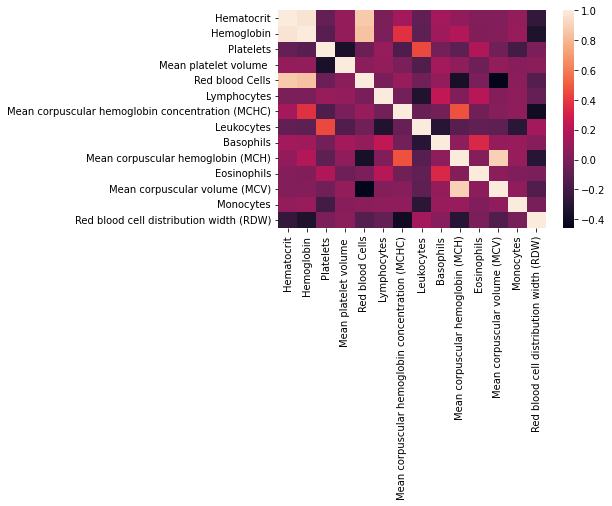

In [73]:
sns.heatmap(df[blood_columns].corr())#matrice de corhelation

In [ ]:
#relation entre blodd et age

ValueError: could not convert string to float: 'not_detected'

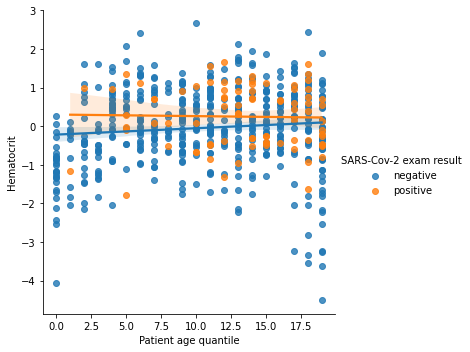

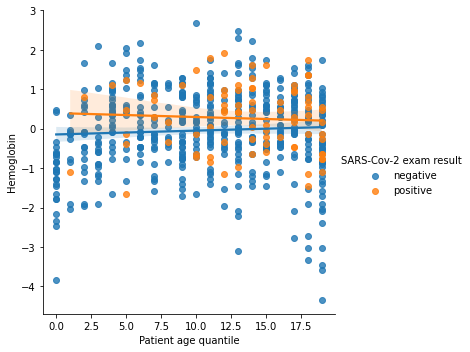

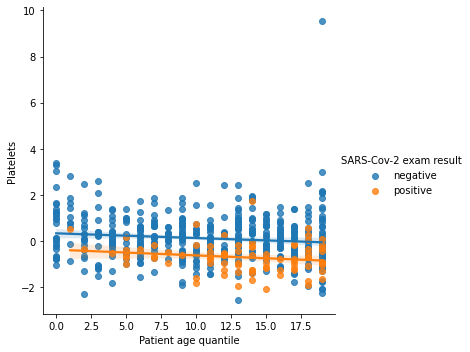

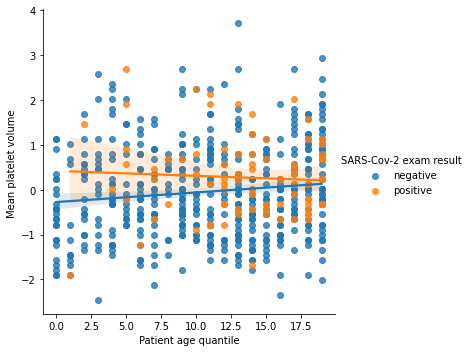

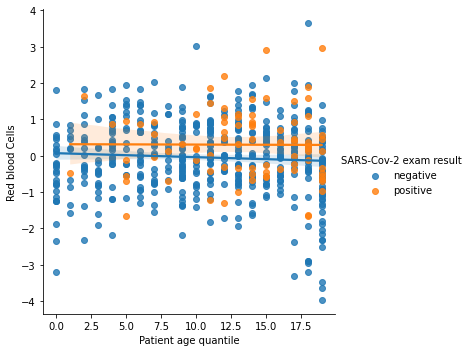

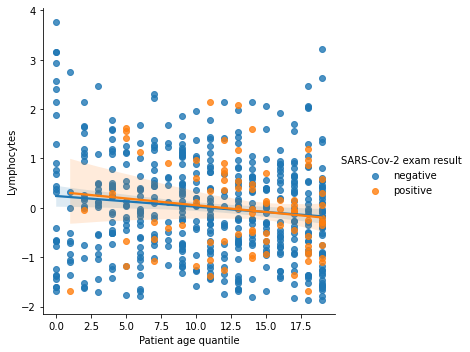

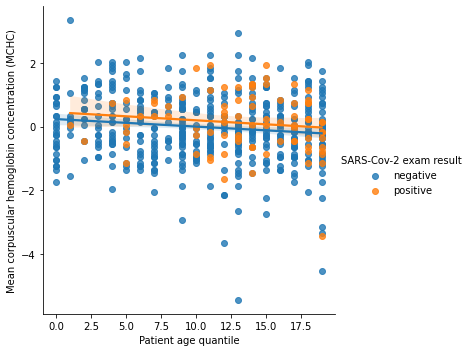

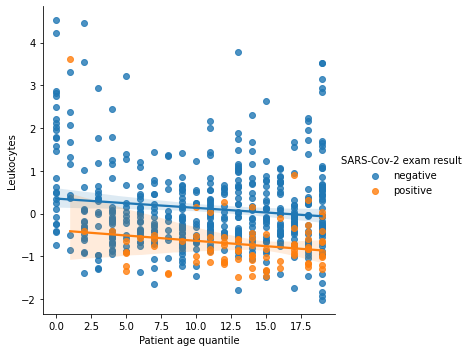

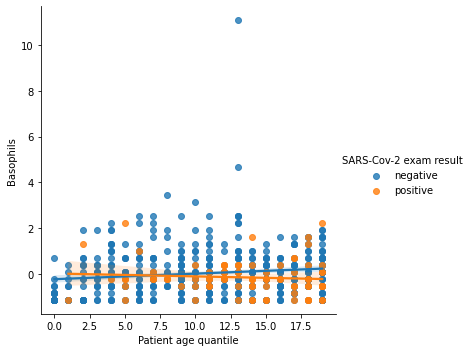

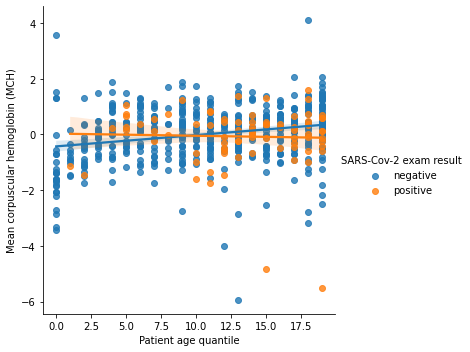

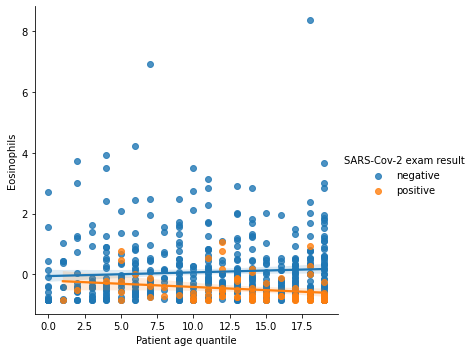

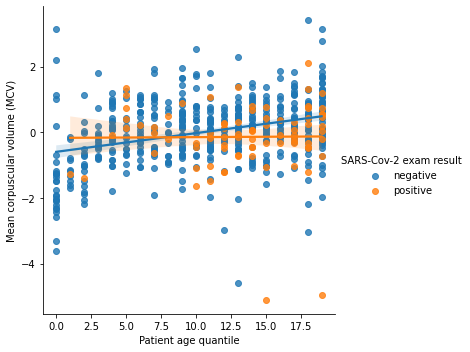

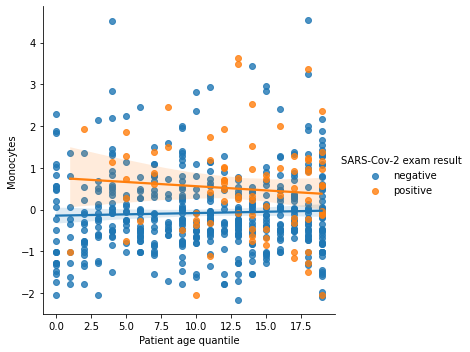

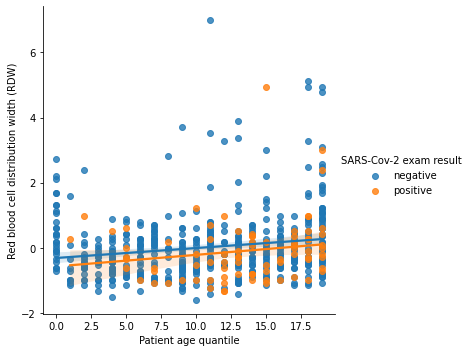

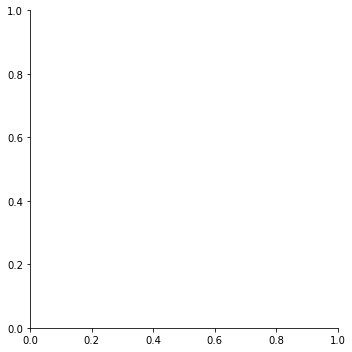

In [90]:
for col in blood_columns:
    sns.lmplot(x='Patient age quantile',y=col,hue='SARS-Cov-2 exam result',data=df)
    

In [74]:
df.corr()['Patient age quantile'].sort_values()
#on remarque que la crrelation est tros faible donc generalement il ya pas de relation entre lage et le groupe sanguin

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

In [93]:
#relation entre les type d influenza et le rapide test

In [95]:
pd.crosstab(df['Influenza A'],df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [96]:
pd.crosstab(df['Influenza B'],df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

In [98]:
#rapide test ne donne pas de bon resultat 
# on passe a relation maladie/blodd data:

In [75]:
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >=1
df.head() # on elimine les deux derniere colonne rapide test a et b  


Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [104]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]


C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

ValueError: could not convert string to float: 'not_detected'

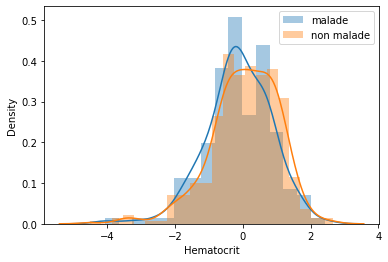

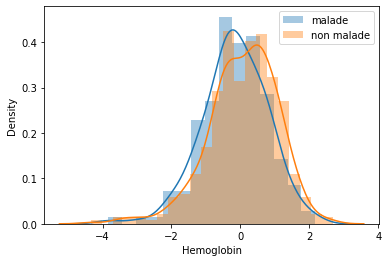

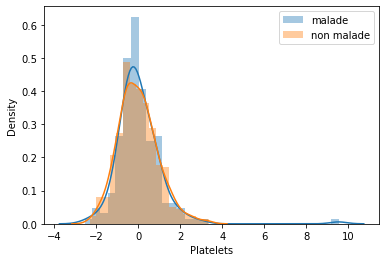

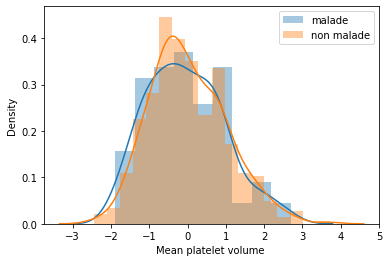

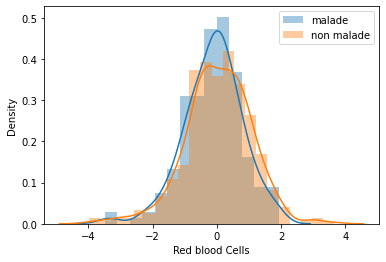

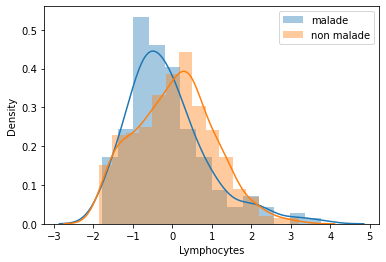

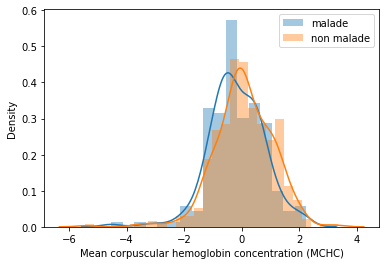

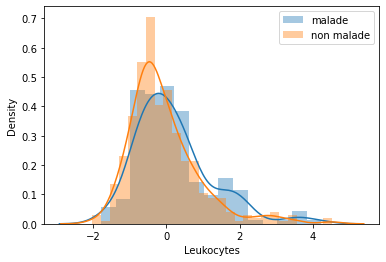

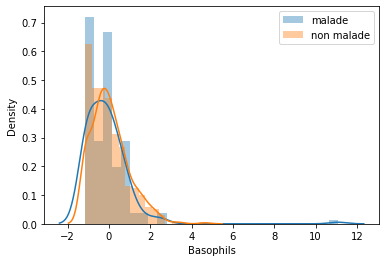

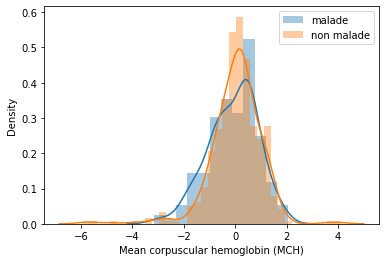

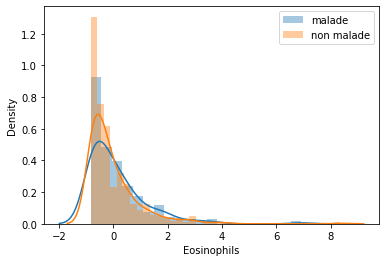

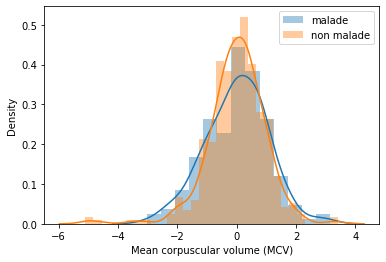

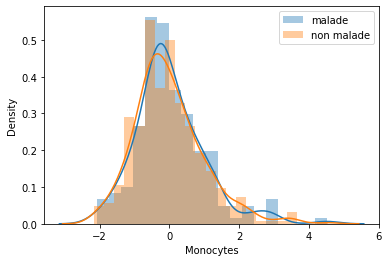

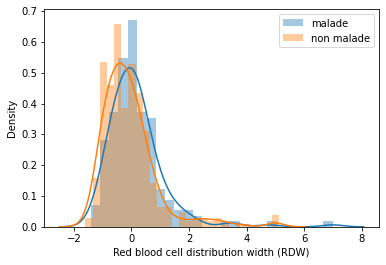

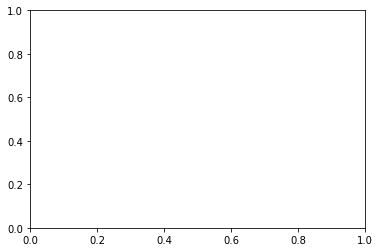

In [105]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label='malade')
    sns.distplot(non_malade_df[col], label='non malade')
    plt.legend()

In [106]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [107]:
df['statut'] = df.apply(hospitalisation, axis=1)
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

ValueError: could not convert string to float: 'not_detected'

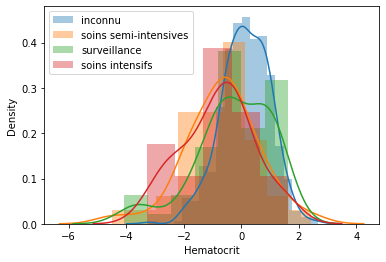

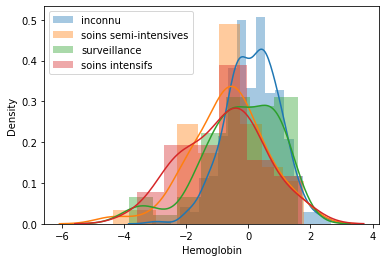

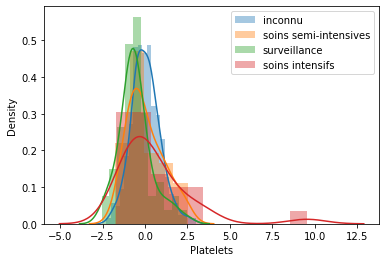

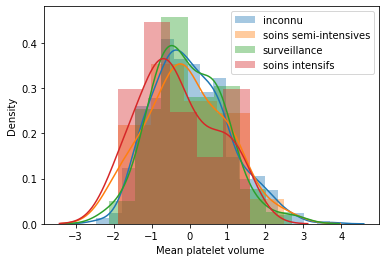

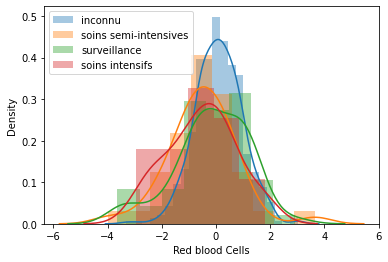

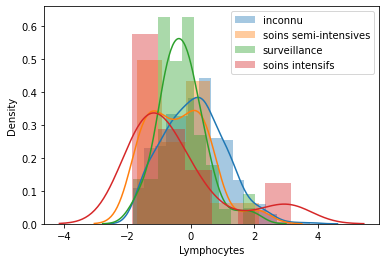

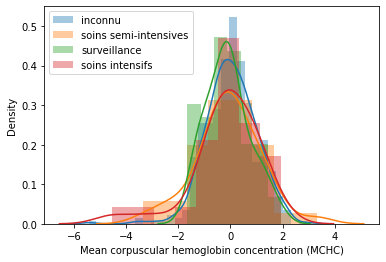

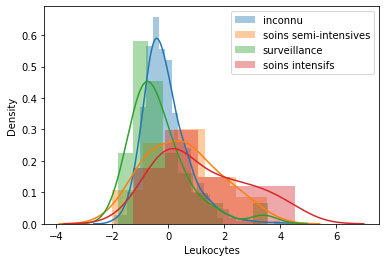

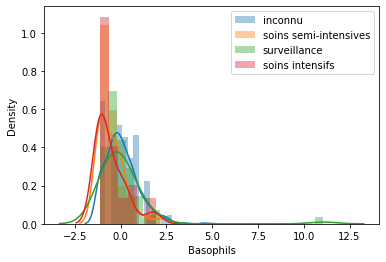

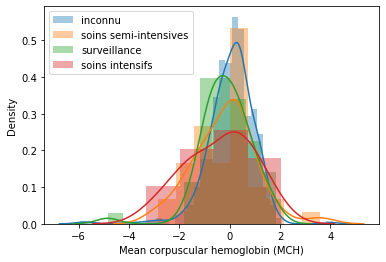

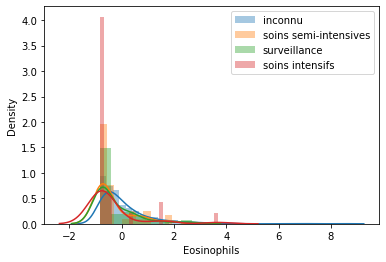

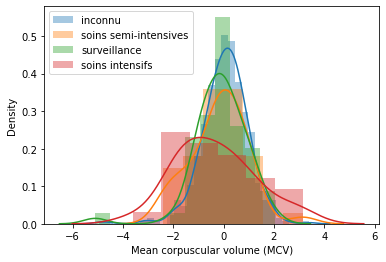

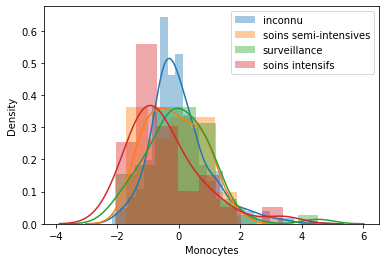

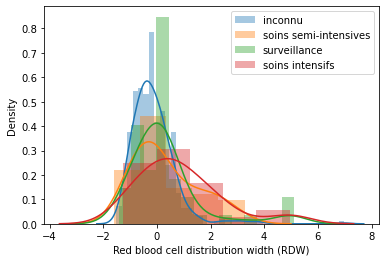

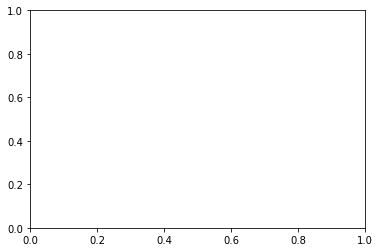

In [108]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

In [109]:
#NAN

<AxesSubplot:>

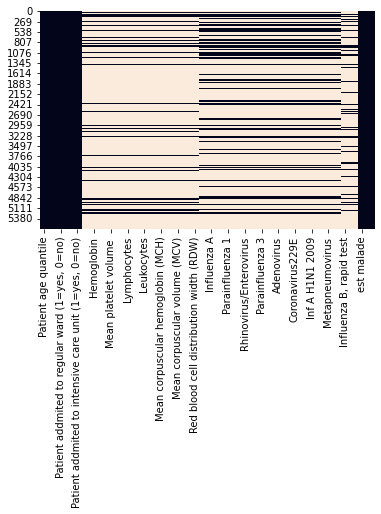

In [110]:
sns.heatmap(df.isna(), cbar=False)

In [111]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [113]:
#si on suprime les donnes manquantes les donnes seront plkus petit 99 par rapport a 5000, donc on va les remplir avec filna 

In [78]:
df1=df[viral_columns[:-2]]
df1['covid']=df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)
#on veut voir quel sera la relation avec le target si on elimine les données 


C:\Users\mouad\AppData\Local\Temp/ipykernel_21452/424411346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid']=df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [116]:
df2=df[blood_columns[:-2]]
df2 ['covid']=df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)
#on veut voir quel sera la relation avec le target si on elimine les données 

C:\Users\mouad\AppData\Local\Temp/ipykernel_16208/4194348711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2 ['covid']=df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

# test

In [136]:
from scipy.stats import ttest_ind

In [117]:
positif_df.shape

(558, 38)

In [118]:
negatif_df.shape

(5086, 38)

In [119]:
# pour effectuer les ltest il est preferable d avoir des classes balanceés entre des differents groupe : negative = positive 

In [ ]:
# technique d echantionnage

In [126]:
balanced_neg=negatif_df.sample(positif_df.shape[0])
balanced_neg

Patient age quantile SARS-Cov-2 exam result  \
2579                    14               negative   
3303                    14               negative   
3814                    14               negative   
1385                    15               negative   
4312                    11               negative   
...                    ...                    ...   
5296                     9               negative   
807                     19               negative   
5586                     4               negative   
4091                    18               negative   
1534                    17               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
2579                                               0   
3303                                               0   
3814                                               0   
1385                                               0   
4312                                               0   
...                                              ...   
5296                                               0   
807                                                0   
5586                                               0   
4091                                               0   
1534                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
2579                                                  0       
3303                                                  0       
3814                                                  0       
1385                                                  0       
4312                                                  0       
...                                                 ...       
5296                                                  0       
807                                                   0       
5586                                                  0       
4091                                                  0       
1534                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
2579                                                  0        1.266501   
3303                                                  0             NaN   
3814                                                  0             NaN   
1385                                                  0             NaN   
4312                                                  0             NaN   
...                                                 ...             ...   
5296                                                  0             NaN   
807                                                   0             NaN   
5586                                                  0             NaN   
4091                                                  0       -0.427254   
1534                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
2579    1.794683  -1.396740              -0.438097         1.671106   
3303         NaN        NaN                    NaN              NaN   
3814         NaN        NaN                    NaN              NaN   
1385         NaN        NaN                    NaN              NaN   
4312         NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5296         NaN        NaN                    NaN              NaN   
807          NaN        NaN                    NaN              NaN   
5586         NaN        NaN                    NaN              NaN   
4091   -0.648900   0.876948              -0.886869         0.031483   
1534         NaN        NaN                    NaN              NaN   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
2579    -0.722178                                          2.136136   
3303          NaN                          

In [140]:
def t_test(col):
    alpha=0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positif_df[col].dropna())
    if alpha > p:
        return 'HO REJETEE'
    else:
        return 0

In [141]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- HO REJETEE
Mean platelet volume ----------------------------- HO REJETEE
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- HO REJETEE
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- HO REJETEE
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- HO REJETEE
Red blood cell distribution width (RDW)----------- 0


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
#notre hypotese concernant plateltes et leukocytes et monocites est fausse 

# pre procesing

In [14]:
data1=pd.read_excel('dataset.xlsx')

# ENCODAGE

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df2=data1.copy()
missing_rate=df2.isna().sum()/df2.shape[0] #pourcentage des nan dans chaque colone 
blood_columns=list(df2.columns[(missing_rate<0.9)&(missing_rate>0.88)])
viral_columns=list(df2.columns[(missing_rate<0.80)&(missing_rate>0.75)])
key_columns=['Patient age quantile','SARS-Cov-2 exam result']
df2=df2[key_columns + blood_columns+ viral_columns]
df2.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                               NaN         NaN  ...   
1                                          -0.95079    -0.09461  ...   
2                                               NaN         NaN  ...   
3                                               NaN         NaN  ...   
4                                               NaN         NaN  ...   

   Parainfluenza 3  Chlamydophila pneumoniae    Adenovirus  Parainfluenza 4  \
0              NaN                       NaN           NaN              NaN   
1     not_detected              not_detected  not_detected     not_detected   
2              NaN                       NaN           NaN              NaN   
3              NaN                       NaN           NaN              NaN   
4     not_detected              not_detected  not_detected     not_detected   

   Coronavirus229E  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis  \
0              NaN              NaN             NaN                  NaN   
1     not_detected     not_detected    not_detected         not_detected   
2              NaN              NaN             NaN                  NaN   
3              NaN              NaN             NaN                  NaN   
4     not_detected     not_detected    not_detected         not_detected   

  Metapneumovirus Parainfluenza 2  
0             NaN             NaN  
1    not_detected    not_detected  
2             NaN             NaN  
3             NaN             NaN  
4    not_detected    not_detected  

[5 rows x 33 columns]

In [17]:
train_set, test_set=train_test_split(df2, test_size=0.2, random_state=0)

In [19]:
train_set['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [20]:
def encodage(df2):
    code={'positive':1,
     'negative':0,
     'detected':1,
     'not_detected':0}
    for col in df2.select_dtypes('object'):
        df2[col]=df2[col].map(code)
    return df2
    

In [21]:
def feauture_engineering(df2):
    df2['est malade']=df2[viral_columns].sum(axis=1)>=1 #ajouter une colone lorsque quelqun a au moins une maladie
    df2=df2.drop(viral_columns,axis=1)
    return df2

In [22]:
def imputation(df2):
    df2=df2.dropna(axis=0)
    return df2

In [23]:
def preprocessing(df2):
    df2=encodage(df2)
    df2=feauture_engineering(df2)
    
   
   
    df2=imputation(df2)
    
    x=df2.drop('SARS-Cov-2 exam result',axis=1)
    y=df2['SARS-Cov-2 exam result']  
    print(y.value_counts())
    
    return x,y
    

In [24]:
x_train,y_train=preprocessing(train_set)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\mouad\AppData\Local\Temp/ipykernel_45128/3784502241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col]=df2[col].map(code)
C:\Users\mouad\AppData\Local\Temp/ipykernel_45128/445926905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['est malade']=df2[viral_columns].sum(axis=1)>=1 #ajouter une colone lorsque quelqun a au moins une maladie


In [26]:
x_test,y_test=preprocessing(test_set)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\mouad\AppData\Local\Temp/ipykernel_45128/3784502241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col]=df2[col].map(code)
C:\Users\mouad\AppData\Local\Temp/ipykernel_45128/445926905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['est malade']=df2[viral_columns].sum(axis=1)>=1 #ajouter une colone lorsque quelqun a au moins une maladie


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.decomposition import PCA


In [75]:
#les dix premiere features par impotance
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [102]:
list_models={'RandomForest':RandomForest,'Adaboost':Adaboost,'svm':SVM,'knn':KNN}
SVM


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

RandomForest
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

Adaboost
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111

svm
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71  

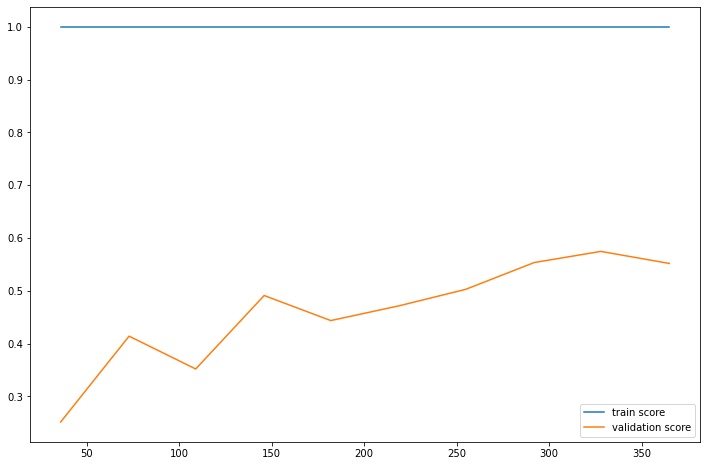

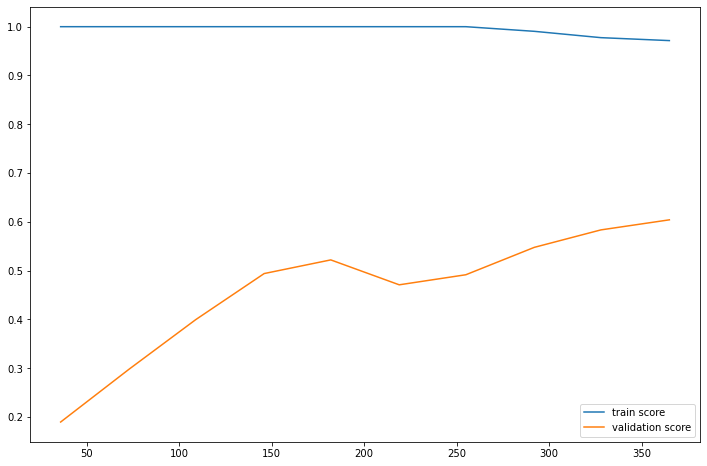

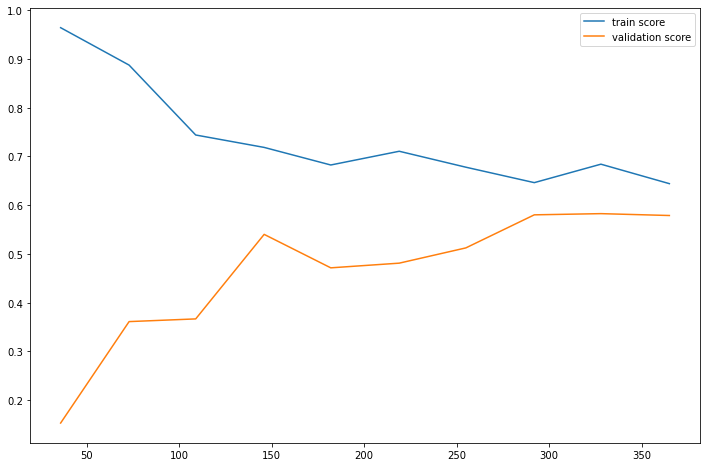

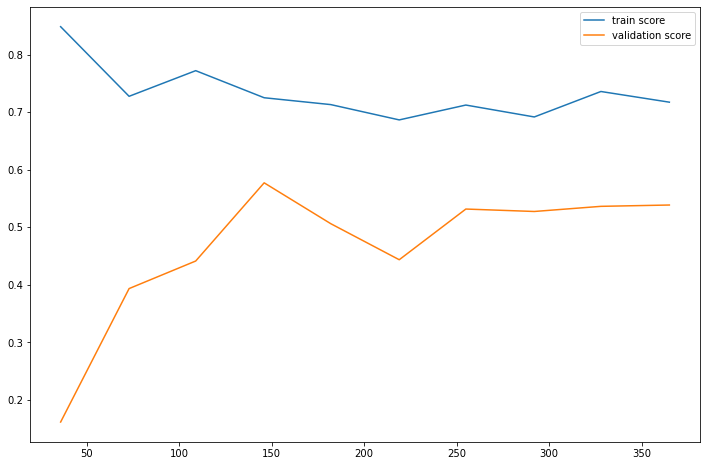

In [81]:
for name,model in list_models.items():
    print(name)
    evaluation(model)

In [83]:
#metric d evaluation

In [30]:
from sklearn.metrics import f1_score, confusion_matrix , classification_report
from sklearn.model_selection import learning_curve

In [16]:
x_test

Patient age quantile  Hematocrit  Hemoglobin  Platelets  \
895                     11   -0.152590    0.416252  -0.215930   
4762                     4    0.442512    0.353596   0.186048   
3378                    13    0.236515    0.040316  -0.479728   
1180                    14   -0.289922   -0.272964   0.387037   
2658                     7    0.877395    1.105468   0.826701   
...                    ...         ...         ...        ...   
4314                    17    0.648510    0.666876  -0.617907   
552                     11   -0.106813    0.353596  -0.994762   
5223                     6    1.129169    1.168124  -0.328986   
1281                    16   -0.221256   -0.210308   0.512655   
4410                    14   -1.342796   -1.338116   0.462408   

      Mean platelet volume   Red blood Cells  Lymphocytes  \
895                1.693575         0.877740     1.785361   
4762               1.693575         0.313568     1.188328   
3378               0.683835        -0.250603    -1.029223   
1180              -0.886869        -0.567950     0.633940   
2658              -1.672222         0.489872    -0.526010   
...                     ...              ...          ...   
4314               1.469188         0.913001     0.002791   
552                1.356995         0.013852    -0.773352   
5223              -1.223449         0.860109     1.128625   
1281              -1.111256        -0.708992     1.930355   
4410              -1.335643        -1.590510    -1.438617   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
895                                           2.235712   -0.553771   1.914447   
4762                                         -0.253742   -0.848747   0.692611   
3378                                         -0.652057    0.364550  -0.529226   
1180                                          0.044991   -0.676214   0.081693   
2658                                          1.040773    0.456383  -0.834685   
...                                                ...         ...        ...   
4314                                          0.244149   -0.205922   1.303529   
552                                           1.837398   -0.428545   2.525365   
5223                                          0.343725   -0.584382   0.998070   
1281                                          0.044991    0.086271  -0.834685   
4410                                         -0.353319   -0.464722  -1.140144   

      ...  Parainfluenza 3  Chlamydophila pneumoniae  Adenovirus  \
895   ...              0.0                       0.0         0.0   
4762  ...              0.0                       0.0         0.0   
3378  ...              0.0                       0.0         0.0   
1180  ...              0.0                       0.0         0.0   
2658  ...              0.0                       0.0         0.0   
...   ...              ...                       ...         ...   
4314  ...              0.0                       0.0         0.0   
552   ...              0.0                       0.0         0.0   
5223  ...              0.0                       0.0         0.0   
1281  ...              0.0                       0.0         0.0   
4410  ...              0.0                       0.0         0.0   

      Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
895               0.0              0.0              0.0              0.0   
4762              0.0              0.0              0.0              0.0   
3378              0.0              0.0              0.0              0.0   
1180              0.0              0.0              0.0              0.0   
2658              0.0              0.0              0.0              0.0   
...               ...              ...              ...              ...   
4314              0.0              0.0              0.0              0.0   
552               0.0              0.0              0.0              1.0   
5223              

In [112]:
def evaluation (model):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    
    N, train_score,val_score=learning_curve(model,x_train,y_train,cv=4,scoring='f1',
                                            train_sizes=np.linspace(0.1,1,10))
    #on a utiliser le score f1 car il est un tres bon rapport entre la precision et le recall
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1), label="train score")
    plt.plot(N,val_score.mean(axis=1), label="validation score")#N = nombre des echantillions qui ont servé pour l entrainement du modele
    plt.legend()

    

[[88  7]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



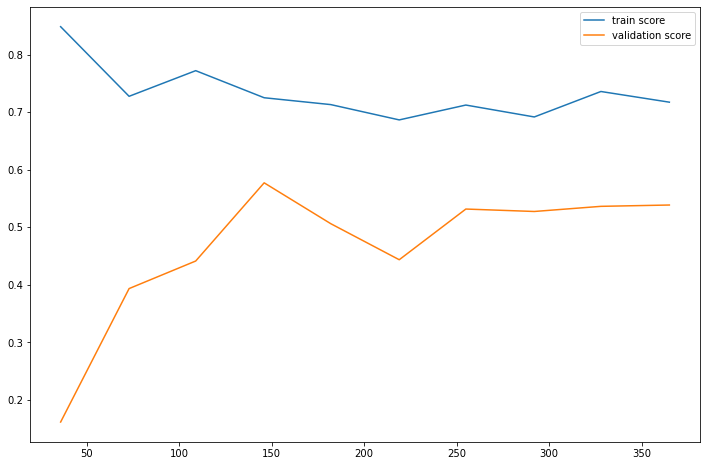

In [131]:
evaluation(model)

# notre modele est en overfitting car il est un score du 100% sur les données du train set par contre il est incapable de generalisé sur les nouveaux donneés donc on doit modifier notre dataset en ajoutant plus de donnees a la machine



# #donc on essai de modifier la fonction d imputation est c est ca le preprocessing on comence par un simple preprocessing et on test des idees au fure et a mesure pour ameliorer la perfermonce
    

In [20]:
model.feature_importances_

array([0.        , 0.0077494 , 0.        , 0.1613017 , 0.03396573,
       0.14004635, 0.00426601, 0.04760348, 0.22230193, 0.02415341,
       0.02647248, 0.06508593, 0.02817897, 0.00500147, 0.0597613 ,
       0.        , 0.        , 0.078269  , 0.        , 0.        ,
       0.02012784, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04683593, 0.        ,
       0.02887907, 0.        ])

In [114]:
#injecter ce tableau dans un dataframe danlequel pour chaque valeur on aura la colone associée

#pd.DataFrame(model.feature_importances_, index=x_train.columns).plot.bar(figsize=(12,8))

In [ ]:
#on constate que les variables de type virale nont pas d importance donc on commence de les elimiber
#mais apres cet elimination on trouve que ca sert a rien apres l evaluation

In [ ]:
#notre deuxieme solotion  est d utiliser un modele qui lutte contre l overfitting(random forest)

# OPTIMISATION

In [93]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [82]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [101]:
hyper_param={'svc__gamma':[1e-3,1e-4],
             'svc__C':[1,10,100,1000],
             'pipeline__polynomialfeatures__degree':[2,3,4],
             'pipeline__selectkbest__k':range(40,60)
            }
#si on fait ce reglage de tous ces parametres avec grid on risque d attendre beaucoup, donc on va utiliser romdomisesearch

In [100]:
#grid=GridSearchCV(svm,hyper_param,scoring='recall',cv=4)
grid=RandomizedSearchCV(SVM,hyper_param,scoring='recall',cv=4,n_iter=40)
grid.fit(x_train,y_train)
print(grid.best_params_)
y_pred=grid.predict(x_test)
print(classification_report(y_test,y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 51, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        95
           1       0.57      0.50      0.53        16

    accuracy                           0.87       111
   macro avg       0.74      0.72      0.73       111
weighted avg       0.87      0.87      0.87       111



[[89  6]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        95
           1       0.57      0.50      0.53        16

    accuracy                           0.87       111
   macro avg       0.74      0.72      0.73       111
weighted avg       0.87      0.87      0.87       111



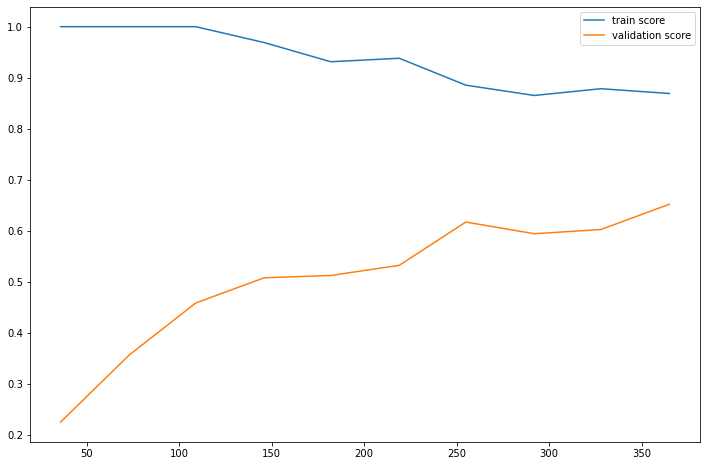

In [103]:
evaluation(grid.best_estimator_)

In [104]:
#PRECISION RECALL CURVE

In [106]:
from sklearn.metrics import precision_recall_curve
#precision recaal curve nous permet de visualiser la future precision du modele en fonction dun seuil de precision

In [108]:
precision,recall,threshold=precision_recall_curve(y_test,grid.best_estimator_.decision_function(x_test))

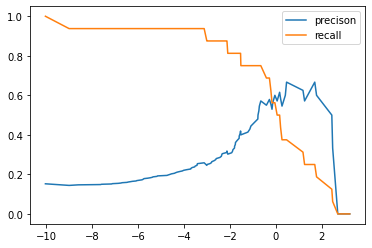

In [111]:
plt.plot(threshold,precision[:-1],label='precison')
plt.plot(threshold,recall[:-1],label='recall')
plt.legend()

In [116]:
def model_final(model,x, threshold=0):
    return model.decision_function(x)>threshold
    

In [120]:
y_pred=model_final(grid.best_estimator_,x_test,threshold=-1)

In [122]:
from sklearn.metrics import recall_score

In [123]:
recall_score(y_test,y_pred)

0.75

In [124]:
f1_score(y_test,y_pred)

0.5714285714285714

In [134]:
model.score(x_test,y_test)

0.8648648648648649